## **1. Data Loading & Exploration**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Setting the color palette for seaborn plots
sns.set_palette("pastel")

# Mounting Google Drive to the specified directory
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Loading the data
path = '/content/gdrive/MyDrive/BA815-Customer-Churn-HW3/Case-Data.xlsx'
data = pd.read_excel(path, sheet_name='Case Data')
data.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


In [ ]:
# Renaming some column names
data.rename(columns={'Customer Age (in months)':'Customer Age' ,'Churn (1 = Yes, 0 = No)':'Churn', ' Days Since Last Login 0-1':'Days Since Last Login 0-1'}, inplace=True)
data.head()

,ID,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


In [ ]:
# Checking overall dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         6347 non-null   int64  
 1   Customer Age               6347 non-null   int64  
 2   Churn                      6347 non-null   int64  
 3   CHI Score Month 0          6347 non-null   int64  
 4   CHI Score 0-1              6347 non-null   int64  
 5   Support Cases Month 0      6347 non-null   int64  
 6   Support Cases 0-1          6347 non-null   int64  
 7   SP Month 0                 6347 non-null   float64
 8   SP 0-1                     6347 non-null   float64
 9   Logins 0-1                 6347 non-null   int64  
 10  Blog Articles 0-1          6347 non-null   int64  
 11  Views 0-1                  6347 non-null   int64  
 12  Days Since Last Login 0-1  6347 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 644.7 KB


**Note:**
- The dataset contains 6347 records and 13 fields
- There are no NULL values in the dataset
- All the columns have been marked as numeric (although some are actually categorical in nature)

In [ ]:
# Descriptive statistics for the numerical columns
data.describe()

,ID,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3174.000000,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932,0.812781,0.030169,15.727903,0.157240,96.310540,1.764613
std,1832.365411,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942,1.320530,1.460336,42.119061,4.660607,3152.411673,17.966020
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1587.500000,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,3174.000000,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4760.500000,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,27.000000,3.000000
max,6347.000000,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


Unique values in the Churn column:
    Churn
0   6024
1    323


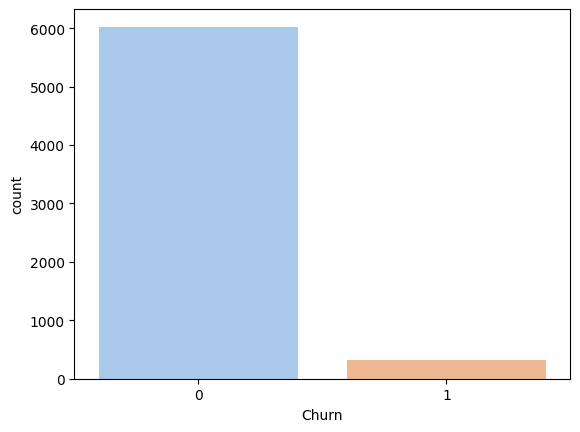

In [ ]:
# Verifying that 'Churn' is a categorical variable with limited categories
print('Unique values in the Churn column:\n', pd.DataFrame(data['Churn'].value_counts()))

# Plotting the distribution of the categories in the 'Churn' variable
sns.countplot(data=data, x='Churn')
plt.show();

**Note:**
- The 'Churn' column comprises two categories, and it is advisable to treat it as a categorical variable.
- Additionally, the dataset demonstrates an imbalance, with the majority of records (94%) indicating non-churned instances, while only a minority (6%) represents churned customers. Constructing predictive models on such an imbalanced dataset necessitates thoughtful handling.

In [ ]:
# Converting the data type of the 'Churn' column from integer to category
data = data.astype({'Churn':'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         6347 non-null   int64   
 1   Customer Age               6347 non-null   int64   
 2   Churn                      6347 non-null   category
 3   CHI Score Month 0          6347 non-null   int64   
 4   CHI Score 0-1              6347 non-null   int64   
 5   Support Cases Month 0      6347 non-null   int64   
 6   Support Cases 0-1          6347 non-null   int64   
 7   SP Month 0                 6347 non-null   float64 
 8   SP 0-1                     6347 non-null   float64 
 9   Logins 0-1                 6347 non-null   int64   
 10  Blog Articles 0-1          6347 non-null   int64   
 11  Views 0-1                  6347 non-null   int64   
 12  Days Since Last Login 0-1  6347 non-null   int64   
dtypes: category(1), float64(2), int64

## **2. Tasks**

### **Question 1: Age and Churn Rate Correlation Analysis**

---

Is Wall’s belief about the dependence of churn rates on customer age supported by the data?

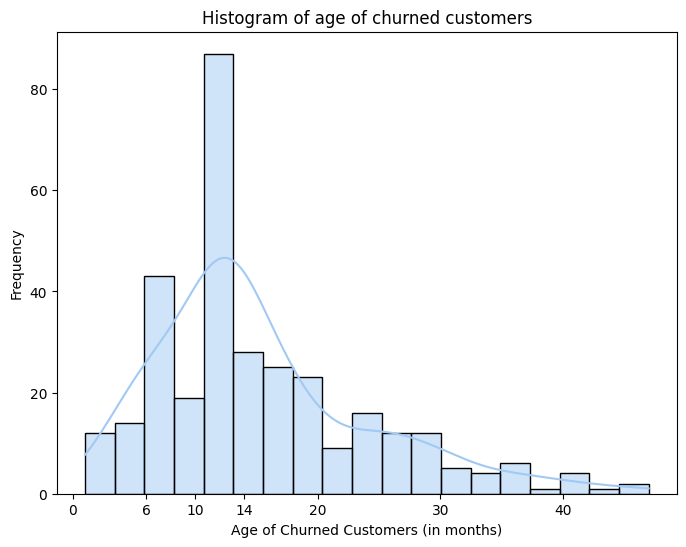

In [ ]:
# Subsetting only the churned customers
churned_customers = data[data['Churn'] == 1]

plt.figure(figsize=(8, 6))

# Creating a histogram with kernel density estimate for the age of churned customers
sns.histplot(data=churned_customers, x='Customer Age', kde=True)

plt.title('Histogram of age of churned customers')
plt.xlabel('Age of Churned Customers (in months)')
plt.ylabel('Frequency')
plt.xticks([0, 6, 10, 14, 20, 30, 40])
plt.show();

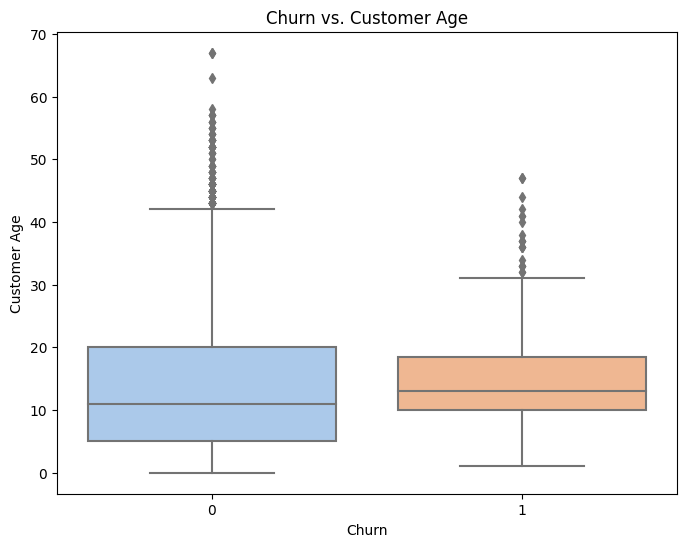

In [ ]:
# Box plot to check the distribution of age across the 2 categories (0: no churn, 1:churn)
plt.figure(figsize=(8, 6))

# Creating a box plot to visualize the distribution of customer age for each churn category
sns.boxplot(x='Churn', y='Customer Age', data=data)

plt.title('Churn vs. Customer Age')
plt.xlabel('Churn')
plt.ylabel('Customer Age')
plt.show();

In [ ]:
# Importing the point-biserial correlation coefficient function from scipy.stats
from scipy.stats import pointbiserialr

# Calculating point-biserial correlation coefficient (correlation metric between a binary categorical and a numeric variable)
correlation_coefficient, p_value = pointbiserialr(data['Customer Age'], data['Churn'])

print(f"Point-Biserial Correlation Coefficient: {np.round(correlation_coefficient, 2)}")
print(f"P-value: {np.round(p_value, 2)}")

Point-Biserial Correlation Coefficient: 0.03
P-value: 0.02


**Answer 1**
- As suspected by Wall, we can confirm from the above plots (histogram & boxplot) that the majority of churns occur for customers with age between 6 - 14 months. Moreover, for customer age below 6 months and above 14 months the churn rate is significantly lower.  
- Additionally, the point-biserial coefficient also indicates a small positive but significant correlation between customer age and churn as suggested by a p_value of 0.02 (< 0.05). However, it's important to note that correlation does not imply causation, and the practical significance of this correlation should also be considered in the context of the domain.

### **Question 2: Regression Model Implementation**

---

Run a regression model that best predicts the probability that a customer leaves.

In [ ]:
# Separating the target and predictor variables

X = data.drop(['ID','Churn'], axis=1)
y = data['Churn'].copy()

In [ ]:
# Splitting the data into train and test sets

# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Using train_test_split to split the feature matrix (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (5077, 11)
X test shape:  (1270, 11)
y train shape:  (5077,)
y test shape:  (1270,)


In [ ]:
# Training a Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

# Creating a Logistic Regression model with specified parameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the Logistic Regression model to the training data
log_reg.fit(X_train, y_train)

# Predicting probabilities of the positive class (1) for the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Setting a threshold for converting probabilities to binary predictions
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)

# Calculating the accuracy and balanced accuracy score for the Logistic Regression model
print(f"Accuracy Score: {np.round(accuracy_score(y_test, y_pred), 2)}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.95
Balanced Accuracy Score: 0.5


**Answer 2**

In the logistic regression model trained on a dataset to predict customer churn, the achieved accuracy score is 95%. However, it's essential to note that the balanced accuracy score is 0.5, indicating potential challenges in correctly predicting churn instances due to the imbalanced nature of the dataset, where 94% of records correspond to non-churned instances and only 16% to churned instances. The model's overall accuracy might be influenced by the dominant class, emphasizing the importance of considering additional evaluation metrics like balanced accuracy.

#### **Question 2.1: Customer 672 Probability Analysis**

---

What is the predicted probability that Customer 672 will leave between December 2011 and February 2012? Is that high or low? Did that customer actually leave?

In [ ]:
# Selecting data for Customer 672
data_672 = data.loc[data['ID'] == 672]

# Extracting features (X) and target variable (y) for Customer 672
X_672 = data_672.drop(columns=['ID', 'Churn'], axis=1)
y_672 = data_672['Churn'].iloc[0]

# Predicting the probability of churn for Customer 672 using the trained Logistic Regression model
y_pred_672 = log_reg.predict_proba(X_672)[:, 1]

# Determining churn prediction and actual churn status indicators
churn_pred_indicator = "high" if y_pred_672 > 0.5 else "low"
churn_actual_indicator = "stayed" if y_672 == 0 else "left"

# Displaying results for Customer 672
print('Answer 2.1')
print('The probability that Customer 672 will leave between December 2011 and February 2012 is: {}'.format(y_pred_672[0]))
print('The above obtained probability is {} indicating that customer 672 will stay'.format(churn_pred_indicator))
print('Actual churn indicator for Customer 672 = {} which indicates that this customer {}'.format(y_672, churn_actual_indicator))

Answer 2.1
The probability that Customer 672 will leave between December 2011 and February 2012 is: 0.034121021907644176
The above obtained probability is low indicating that customer 672 will stay
Actual churn indicator for Customer 672 = 0 which indicates that this customer stayed


#### **Question 2.2: Probability Assessments for Customers 354 & 5203**

---

What about Customers 354 and 5203?

In [ ]:
# Selecting data for Customer 354
data_354 = data.loc[data['ID'] == 354]

# Extracting features (X) and target variable (y) for Customer 354
X_354 = data_354.drop(columns=['ID', 'Churn'], axis=1)
y_354 = data_354['Churn'].iloc[0]

# Predicting the probability of churn for Customer 354 using the trained Logistic Regression model
y_pred_354 = log_reg.predict_proba(X_354)[:, 1]

# Determining churn prediction and actual churn status indicators for Customer 354
churn_pred_indicator = "high" if y_pred_354 > 0.5 else "low"
churn_actual_indicator = "stayed" if y_354 == 0 else "left"

# Displaying results for Customer 354
print('Answer 2.2')
print('The probability that Customer 354 will leave between December 2011 and February 2012 is: {}'.format(y_pred_354[0]))
print('The above obtained probability is {} indicating that customer 354 will stay'.format(churn_pred_indicator))
print('Actual churn indicator for Customer 354 = {} which indicates that this customer {}'.format(y_354, churn_actual_indicator))

Answer 2.2
The probability that Customer 354 will leave between December 2011 and February 2012 is: 0.04069992497196562
The above obtained probability is low indicating that customer 354 will stay
Actual churn indicator for Customer 354 = 0 which indicates that this customer stayed


In [ ]:
# Selecting data for Customer 5203
data_5203 = data.loc[data['ID'] == 5203]

# Extracting features (X) and target variable (y) for Customer 5203
X_5203 = data_5203.drop(columns=['ID', 'Churn'], axis=1)
y_5203 = data_5203['Churn'].iloc[0]

# Predicting the probability of churn for Customer 5203 using the trained Logistic Regression model
y_pred_5203 = log_reg.predict_proba(X_5203)[:, 1]

# Determining churn prediction and actual churn status indicators for Customer 5203
churn_pred_indicator = "high" if y_pred_5203 > 0.5 else "low"
churn_actual_indicator = "stayed" if y_5203 == 0 else "left"

# Displaying results for Customer 5203
print('Answer 2.2')
print('The probability that Customer 5203 will leave between December 2011 and February 2012 is: {}'.format(y_pred_5203[0]))
print('The above obtained probability is {} indicating that customer 5203 will stay'.format(churn_pred_indicator))
print('Actual churn indicator for Customer 5203 = {} which indicates that this customer {}'.format(y_5203, churn_actual_indicator))

Answer 2.2
The probability that Customer 5203 will leave between December 2011 and February 2012 is: 0.04685867617096338
The above obtained probability is low indicating that customer 5203 will stay
Actual churn indicator for Customer 5203 = 0 which indicates that this customer stayed


### **Question 3: Key Contributing Factors**

---

What factors contribute the most to the predicted probability that these customers will leave?

Important Features:
                      Feature  Coefficient
4           Support Cases 0-1     0.125711
10  Days Since Last Login 0-1     0.016813
0                Customer Age     0.012619
7                  Logins 0-1     0.001584
9                   Views 0-1    -0.000111
1           CHI Score Month 0    -0.006038
8           Blog Articles 0-1    -0.008322
6                      SP 0-1    -0.008433
2               CHI Score 0-1    -0.008935
5                  SP Month 0    -0.024242
3       Support Cases Month 0    -0.078230


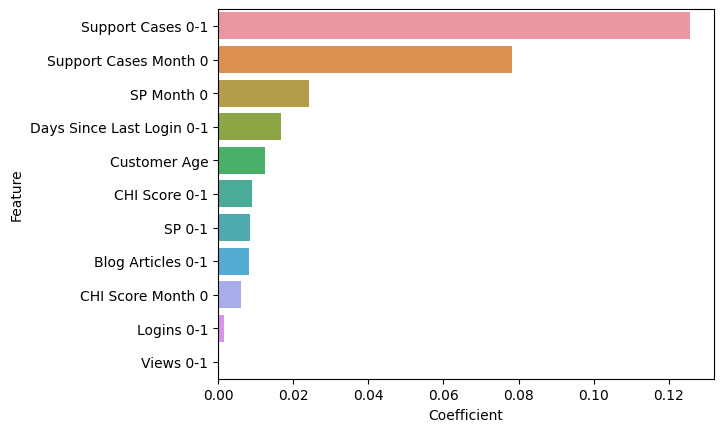

In [ ]:
# Obtain feature importance from the trained logistic regression model
feature_coeffs = log_reg.coef_[0]

# Identify important features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coeffs})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Displaying the important features and their coefficients
print("Important Features:")
print(feature_importance)

# Creating a bar plot to visualize feature importance
feature_importance_abs = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(feature_coeffs)})
feature_importance_abs = feature_importance_abs.sort_values(by='Coefficient', ascending=False)

sns.barplot(data=feature_importance_abs, x='Coefficient', y='Feature')
plt.show();

**Answer 3**

The logistic regression model reveals the following most important features (as seen above) influencing the prediction of customer churn, with their corresponding absolute coefficient values as:
- Support Cases 0-1 (Coefficient = 0.125711): The most impactful feature, indicating that the number of support cases between current & last month has a substantial positive effect on predicting customer churn.
- Support Cases Month 0 (Coefficient = -0.078230): The second most influential feature, suggesting that the number of support cases in the current month has a significant negative impact the prediction of customer churn.
- SP Month 0 (Coefficient = - 0.024242): Similarly, the third most important feature, highlights a negative impact of the SP in the current month on predicting customer churn.

These observations emphasize the significance of specific customer engagement metrics, such as Support Cases and SP, in influencing the model's predictions of churn. It's crucial for the business to focus on and monitor these key features for effective customer retention strategies.

### **Question 4: Wall's Ultimate Question**

---

Provide the list of 100 customers with the highest churn probabilities and the top three drivers of churn for each customer.

In [ ]:
# First: Predicting on the entire dataset using the trained Logistic Regression Model
all_churn_probabilities = log_reg.predict_proba(X)[:, 1]

# Appending this prediction to the original data
data_overall = X.copy()
data_overall['Churn_proba'] = all_churn_probabilities

# Extracting Top 100 customers with the highest churn probabilities
top_100 = data_overall.sort_values(by=['Churn_proba'], ascending=False).head(100)

# Adding the customer ID to the above data
top_100 = top_100.merge(data['ID'], left_index=True, right_index=True)
first_column = top_100.pop('ID')
top_100.insert(0, 'ID', first_column)

# Displaying the top 100 customers likely to churn
print('Top 100 customers likely to churn are:')
top_100

Top 100 customers likely to churn are:


,ID,Customer Age,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Churn_proba
2286,2287,34,227,7,5,5,2.800000,2.800000,11,-4,-27768,0,0.400253
356,357,12,203,25,7,6,2.857143,-0.142857,88,-2,-28322,3,0.380399
108,109,40,0,-125,0,0,0.000000,0.000000,-8,0,-216,6,0.278615
1970,1971,30,0,-113,0,0,0.000000,0.000000,-23,0,69,7,0.227339
2024,2025,28,18,-15,0,0,0.000000,0.000000,0,0,-4634,31,0.219269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,28,0,0,0,0,0.000000,0.000000,0,0,0,31,0.140558
1952,1953,28,0,0,0,0,0.000000,0.000000,0,0,0,31,0.140558
239,240,13,0,-22,0,0,0.000000,0.000000,0,0,-4,30,0.139465
3123,3124,23,19,-71,0,0,0.000000,0.000000,-4,-1,-12,3,0.139248


In [ ]:
# Second: Extracting the Top 3 drivers for these 100 customers

# Extracting the feature names from the DataFrame, excluding 'ID' and 'Churn_proba'
feature_names = list(top_100.drop(columns=['ID', 'Churn_proba'], axis=1).columns)

# Contains the coefficients of logistic regression features
feature_coeffs = feature_coeffs

top_3_features = []

# Iterating over the top 100 customers
  # - Calculating the contribution of each feature for the current customer
  # - Taking the absolute values of the calculated feature contributions
  # - Creating a dictionary with feature names as keys and absolute contributions as values
  # - Sorting the dictionary based on absolute contributions in descending order
  # - Selecting the top 3 features with the highest absolute contributions

for index, row in top_100.iterrows():
    calculated_features = list(row[feature_names] * feature_coeffs)
    absolute_features = [abs(f) for f in calculated_features]
    features_dict = dict(zip(feature_names, absolute_features))
    sorted_dict = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
    top_features = [item[0] for item in sorted_dict][:3]
    top_3_features.append(top_features)

# Adding a new column to the DataFrame containing the top 3 features for each customer
top_100['Top 3 Features'] = top_3_features

# Displaying the DataFrame with the top 100 customers and their top 3 features
top_100

,ID,Customer Age,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Churn_proba,Top 3 Features
2286,2287,34,227,7,5,5,2.800000,2.800000,11,-4,-27768,0,0.400253,"[Views 0-1, CHI Score Month 0, Support Cases 0-1]"
356,357,12,203,25,7,6,2.857143,-0.142857,88,-2,-28322,3,0.380399,"[Views 0-1, CHI Score Month 0, Support Cases 0-1]"
108,109,40,0,-125,0,0,0.000000,0.000000,-8,0,-216,6,0.278615,"[CHI Score 0-1, Customer Age, Days Since Last ..."
1970,1971,30,0,-113,0,0,0.000000,0.000000,-23,0,69,7,0.227339,"[CHI Score 0-1, Customer Age, Days Since Last ..."
2024,2025,28,18,-15,0,0,0.000000,0.000000,0,0,-4634,31,0.219269,"[Days Since Last Login 0-1, Views 0-1, Custome..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,28,0,0,0,0,0.000000,0.000000,0,0,0,31,0.140558,"[Days Since Last Login 0-1, Customer Age, CHI ..."
1952,1953,28,0,0,0,0,0.000000,0.000000,0,0,0,31,0.140558,"[Days Since Last Login 0-1, Customer Age, CHI ..."
239,240,13,0,-22,0,0,0.000000,0.000000,0,0,-4,30,0.139465,"[Days Since Last Login 0-1, CHI Score 0-1, Cus..."
3123,3124,23,19,-71,0,0,0.000000,0.000000,-4,-1,-12,3,0.139248,"[CHI Score 0-1, Customer Age, CHI Score Month 0]"


In [ ]:
# Saving the top 100 customers DataFrame to an Excel file
top_100.to_excel('/content/gdrive/MyDrive/BA815-Customer-Churn-HW3/Top 100 Customers.xlsx', header=True, index=False)